In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import specializer as s
from visualize_network import network_vis

# Function Definitions

In [2]:
def sig(x):
    return np.tanh(x)
def sig2(x):
    return -2 * np.tanh(x)
def zero(x):
    return 0
def one(x):
    return 1
def func1(x):
    return 9/10 * x + 7/4
def func2(x):
    return 9/10 * x + 5/4
def func3(x):
    return 9/10 * x + 2/4

gen_labels = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

# Graph 1 - Linear Dynamics
## Example 1 
$\text{Dynamics}=\begin{bmatrix}
0 & 0 & 1 & 1\\
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 1 & 0 & 0
\end{bmatrix}$

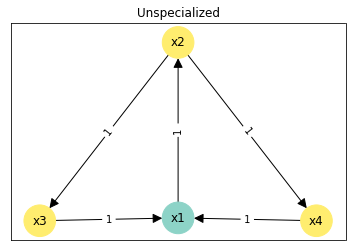

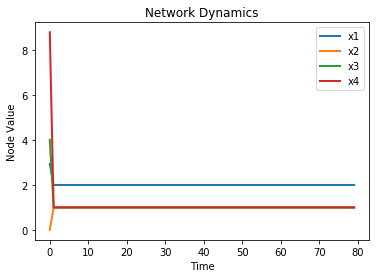

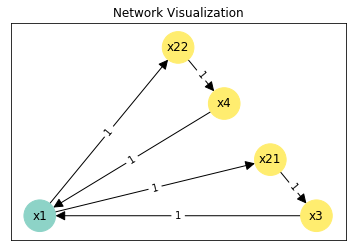

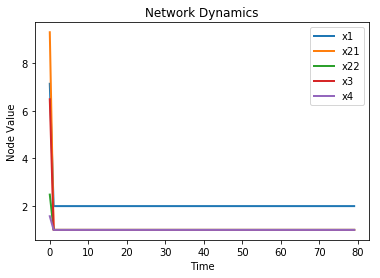

In [3]:
A = np.array([[0, 0, 1, 1], 
              [1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 1, 0, 0]])

f = np.array([[zero, zero, lambda x: 1, lambda x: 1], 
               [lambda x: 1, zero, zero, zero], 
               [zero, lambda x: 1, zero, zero], 
               [zero, lambda x: 1, zero, zero]])

a = np.array([lambda x: 0]*4)
# alternate self-dynamic condition
# a = np.array([lambda x: 9/10, lambda x: 1/2, lambda x: 7/10, lambda x: 3/10])

# hardcoded specialized network

#                   1 2.1 2.2 3.1 3.2
A_spec = np.array([[0, 0, 0, 1, 1],
                   [1, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0]])

f_spec = np.array([[zero, zero, zero, one, one],
                   [one, zero, zero, zero, zero],
                   [one, zero, zero, zero, zero],
                   [zero, one, zero, zero, zero],
                   [zero, zero, one, zero, zero]])

a_spec = np.array([zero]*5)

G = s.DirectedGraph(A, (a, f), labels=gen_labels[:4])
network_vis(G, lin=True, lin_dyn=A, save_img=True, title='Unspecialized', filename='ex_1u', spec_layout=True)
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_1u_graph')

G_spec = s.DirectedGraph(A_spec, (a_spec, f_spec), labels=['x1', 'x21', 'x22', 'x3', 'x4'])
network_vis(G_spec, lin=True, lin_dyn=A_spec)
out=G_spec.iterate(80, np.random.random(G_spec.n)*10, graph=True, save_img=True, title='ex_1s_graph')

# G.specialize(['x1'])
# network_vis(G, lin=True, lin_dyn=A, save_img=True, title=r'Specialized on $x_1$', filename='ex_1s')
# out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_1s_graph')

## Example 2
$\text{Dynamics}=\begin{bmatrix}
0 & 0 & 1 & 1\\
2 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 1 & 0 & 0
\end{bmatrix}$

In [13]:
dynamics = np.array([[0, 0, 1, 1], 
                     [2, 0, 0, 0], 
                     [0, 1, 0, 0], 
                     [0, 1, 0, 0]])

dyn_spec = np.array([[0, 0, 0, 1, 1],
                     [1, 0, 0, 0, 0],
                     [1, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0],
                     [0, 0, 1, 0, 0]])

f = np.array([[zero, zero, lambda x: 1, lambda x: 1], 
               [lambda x: 2, zero, zero, zero], 
               [zero, lambda x: 1, zero, zero], 
               [zero, lambda x: 1, zero, zero]])

a = np.array([lambda x: 0]*4)

G = s.DirectedGraph(A, (a, f), labels=gen_labels[:4])
network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title='Unspecialized', filename='ex_2u', spec_layout=True)
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_2u_graph')

# G.specialize(['x1'])
# network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title=r'Specialized on $x_1$', filename='ex_2s')
# out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_2s_graph')

KeyError: 'x3'

## Example 3
$\text{Dynamics}=\begin{bmatrix}
0 & 0 & 1 & 1\\
1 & 0 & 0 & 0\\
0 & 10 & 0 & 0\\
0 & 1 & 0 & 0
\end{bmatrix}$

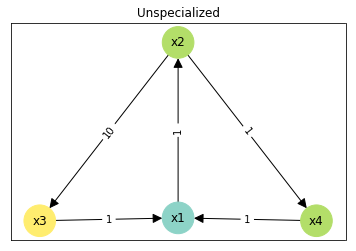

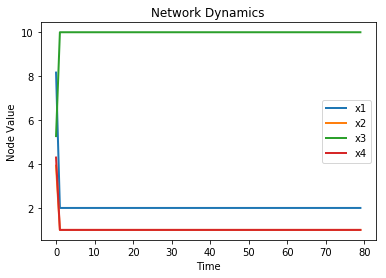

KeyError: 'x3'

In [18]:
dynamics = np.array([[0, 0, 1, 1], 
                     [1, 0, 0, 0], 
                     [0, 10, 0, 0], 
                     [0, 1, 0, 0]])

f = np.array([[zero, zero, lambda x: 1, lambda x: 1], 
               [lambda x: 1, zero, zero, zero], 
               [zero, lambda x: 10, zero, zero], 
               [zero, lambda x: 1, zero, zero]])

a = np.array([lambda x: 0]*4)

G = s.DirectedGraph(A, (a, f), labels=gen_labels[:4])
network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title='Unspecialized', filename='ex_3u', spec_layout=True)
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_3u_graph')

## HARDCODE EXAMPLE
dyn_spec = np.array([[0, 0, 0, 1, 1],
                     [1, 0, 0, 0, 0],
                     [1, 0, 0, 0, 0],
                     [0, 10, 0, 0, 0],
                     [0, 0, 1, 0, 0]])

f_spec = np.array([[zero, zero, zero, lambda x: 1, lambda x: 1],
                   [lambda x: 1, zero, zero, zero, zero],
                   [lambda x: 1, zero, zero, zero, zero],
                   [zero, lambda x: 10, zero, zero, zero],
                   [zero, zero, lambda x: 1, zero, zero]])

G_spec = s.DirectedGraph(A_spec, (a_spec, f_spec), labels=['x1', 'x21', 'x22', 'x3', 'x4'])
network_vis(G_spec, lin=True, lin_dyn=dyn_spec)


# G.specialize(['x1'])
# network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title=r'Specialized on $x_1$', filename='ex_3s')
# out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_3s_graph')

## Example 4
$\text{Dynamics}=\begin{bmatrix}
0 & 0 & 10 & 1\\
1 & 0 & 0 & 0\\
0 & 10 & 0 & 0\\
0 & 1 & 0 & 0
\end{bmatrix}$

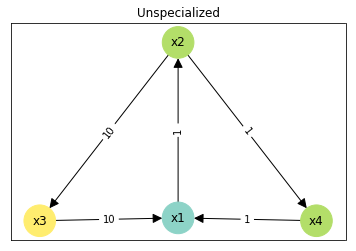

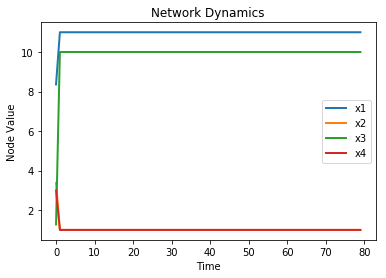

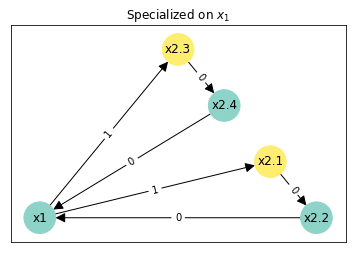

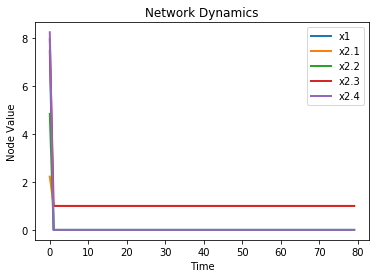

In [22]:
dynamics = np.array([[0, 0, 10, 1], 
                     [1, 0, 0, 0], 
                     [0, 10, 0, 0], 
                     [0, 1, 0, 0]])

f = np.array([[zero, zero, lambda x: 10, lambda x: 1], 
               [lambda x: 1, zero, zero, zero], 
               [zero, lambda x: 10, zero, zero], 
               [zero, lambda x: 1, zero, zero]])

a = np.array([lambda x: 0]*4)

G = s.DirectedGraph(A, (a, f), labels=gen_labels[:4])
network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title='Unspecialized', filename='ex_4u', spec_layout=True)
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_4u_graph')

G.specialize(['x1'])
network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title=r'Specialized on $x_1$', filename='ex_4s')
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_4s_graph')

## Example 5
$\text{Dynamics}=\begin{bmatrix}
0 & 0 & 1 & 1\\
10 & 0 & 0 & 0\\
0 & \frac{1}{10} & 0 & 0\\
0 & 10 & 0 & 0
\end{bmatrix}$

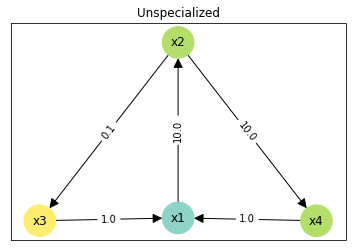

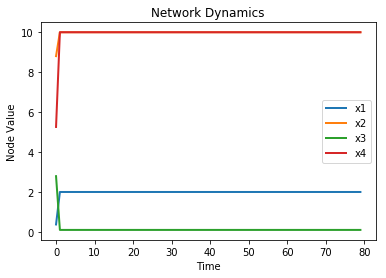

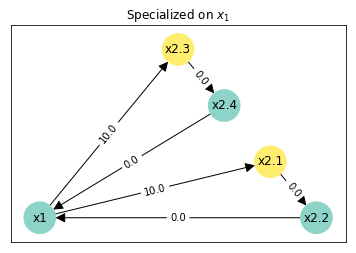

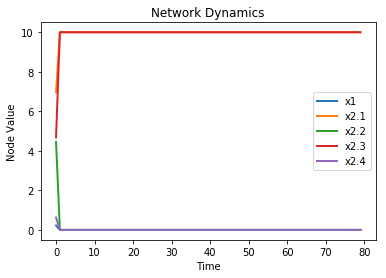

In [23]:
dynamics = np.array([[0, 0, 1, 1], 
                     [10, 0, 0, 0], 
                     [0, 1/10, 0, 0], 
                     [0, 10, 0, 0]])

f = np.array([[zero, zero, lambda x: 1, lambda x: 1], 
               [lambda x: 10, zero, zero, zero], 
               [zero, lambda x: 1/10, zero, zero], 
               [zero, lambda x: 10, zero, zero]])

a = np.array([lambda x: 0]*4)

G = s.DirectedGraph(A, (a, f), labels=gen_labels[:4])
network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title='Unspecialized', filename='ex_5u', spec_layout=True)
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_5u_graph')

G.specialize(['x1'])
network_vis(G, lin=True, lin_dyn=dynamics, save_img=True, title=r'Specialized on $x_1$', filename='ex_5s')
out=G.iterate(80, np.random.random(G.n)*10, graph=True, save_img=True, title='ex_5s_graph')